# Stock Price Forecasting using Stacked LSTM  
## 1.Importing the libraries and gathering data

In [1]:
import pandas_datareader as pdr
import pandas as pd

* Using Tiingo API from Pandas DataReader library which will allow us to get Stock Market data of a particular stock from last 2 years  
* Link for API reference : [Tiingo Stock & Financial Markets Data API](https://api.tiingo.com/)  
* The bottom two cells are commented as we have already gathered the data.
* Here we will try to predict and forecast on the stock of Google

In [2]:
# df = pdr.get_data_tiingo('GOOGL',api_key='YOUR API KEY')

In [3]:
# df.to_csv(r'D:/Academics/Google Machine Learning resources/Projects(Ready)/Stock Market Forecasting/data_gOogl.csv')

In [4]:
df = pd.read_csv('data_gOogl.csv')

In [5]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOGL,2015-07-22 00:00:00+00:00,695.10,713.33,691.62,694.02,4154987,695.10,713.33,691.62,694.02,4154987,0.0,1.0
1,GOOGL,2015-07-23 00:00:00+00:00,674.73,696.07,671.59,691.85,3811598,674.73,696.07,671.59,691.85,3811598,0.0,1.0
2,GOOGL,2015-07-24 00:00:00+00:00,654.77,677.79,653.18,676.77,4131137,654.77,677.79,653.18,676.77,4131137,0.0,1.0
3,GOOGL,2015-07-27 00:00:00+00:00,658.27,667.07,651.55,651.57,2919110,658.27,667.07,651.55,651.57,2919110,0.0,1.0
4,GOOGL,2015-07-28 00:00:00+00:00,659.66,664.10,653.41,661.76,1718193,659.66,664.10,653.41,661.76,1718193,0.0,1.0


In [6]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,GOOGL,2020-07-13 00:00:00+00:00,1512.23,1576.36,1506.56,1549.94,2147700,1512.23,1576.36,1506.56,1549.94,2147700,0.0,1.0
1253,GOOGL,2020-07-14 00:00:00+00:00,1520.86,1522.80,1485.93,1492.79,1905400,1520.86,1522.80,1485.93,1492.79,1905400,0.0,1.0
1254,GOOGL,2020-07-15 00:00:00+00:00,1516.88,1536.33,1497.83,1523.23,1551300,1516.88,1536.33,1497.83,1523.23,1551300,0.0,1.0
1255,GOOGL,2020-07-16 00:00:00+00:00,1514.92,1515.91,1488.27,1501.50,1324200,1514.92,1515.91,1488.27,1501.50,1324200,0.0,1.0
1256,GOOGL,2020-07-17 00:00:00+00:00,1516.85,1523.43,1498.10,1516.91,1713300,1516.85,1523.43,1498.10,1516.91,1713300,0.0,1.0


In [7]:
df1 = df.reset_index()['close']

In [8]:
df1.shape

(1257,)

In [9]:
import matplotlib.pyplot as plt

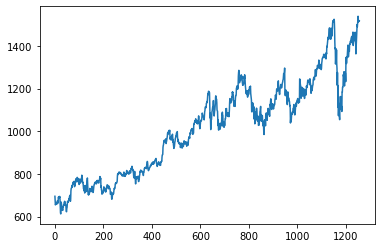

In [10]:
plt.plot(df1)
plt.show()

## 2. Data Preprocessing  
### Scaling

In [11]:
import numpy as np

In [12]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(0,1))
df1 = scalar.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
df1.shape

(1257, 1)

In [14]:
df1

array([[0.08918125],
       [0.06719624],
       [0.04565372],
       ...,
       [0.97611544],
       [0.97400004],
       [0.97608306]])

In [15]:
training_size = int(len(df1)*0.7)
test_size = len(df1)-training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [16]:
training_size,test_size

(879, 378)

### Creating training data and testing data  
Here we cannot use ```train_test_split``` from Scikit Learn as here the data needs to be seperated in sequence where ```train_test_split``` will divide the data randomly, which is not suitable for LSTM as it requires sequential data input.

In [17]:
import numpy

def create_dataset(dataset,time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX),numpy.array(dataY)

In [18]:
time_step = 100
X_train,y_train = create_dataset(train_data,time_step)
X_test,y_test = create_dataset(test_data,time_step)

In [19]:
X_train

array([[0.08918125, 0.06719624, 0.04565372, ..., 0.17556716, 0.16197898,
        0.15926997],
       [0.06719624, 0.04565372, 0.04943122, ..., 0.16197898, 0.15926997,
        0.14888726],
       [0.04565372, 0.04943122, 0.05093142, ..., 0.15926997, 0.14888726,
        0.16196818],
       ...,
       [0.65121851, 0.65780215, 0.6529022 , ..., 0.51039351, 0.50637857,
        0.50333499],
       [0.65780215, 0.6529022 , 0.65758629, ..., 0.50637857, 0.50333499,
        0.48783647],
       [0.6529022 , 0.65758629, 0.65694951, ..., 0.50333499, 0.48783647,
        0.47384894]])

In [20]:
X_test

array([[0.52523367, 0.53406221, 0.50311913, ..., 0.49204568, 0.50757658,
        0.50572021],
       [0.53406221, 0.50311913, 0.50935739, ..., 0.50757658, 0.50572021,
        0.50362639],
       [0.50311913, 0.50935739, 0.50891489, ..., 0.50572021, 0.50362639,
        0.51648067],
       ...,
       [0.97623416, 0.94004576, 0.87140329, ..., 0.97803657, 1.        ,
        0.97109677],
       [0.94004576, 0.87140329, 0.83520409, ..., 1.        , 0.97109677,
        0.98041099],
       [0.87140329, 0.83520409, 0.83968312, ..., 0.97109677, 0.98041099,
        0.97611544]])

In [21]:
print(X_test.shape)

(277, 100)


In [22]:
y_test.shape

(277,)

In [23]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

## 3.Model Creation  
* It is a Sequential Model with layers like Long Short Term Memory(LSTM) and a dense layer.
* The loss function is mean squared error and the optimizer is ADAM.


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [25]:
model = Sequential()

In [26]:
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 [==============================] - 2s 149ms/step - loss: 0.0440 - val_loss: 0.0533
Epoch 2/100
13/13 [==============================] - 1s 54ms/step - loss: 0.0077 - val_loss: 0.0089
Epoch 3/100
13/13 [==============================] - 1s 52ms/step - loss: 0.0033 - val_loss: 0.0128
Epoch 4/100
13/13 [==============================] - 1s 52ms/step - loss: 0.0016 - val_loss: 0.0090
Epoch 5/100
13/13 [==============================] - 1s 52ms/step - loss: 0.0015 - val_loss: 0.0089
Epoch 6/100
13/13 [==============================] - 1s 52ms/step - loss: 0.0014 - val_loss: 0.0079
Epoch 7/100
13/13 [==============================] - 1s 53ms/step - loss: 0.0014 - val_loss: 0.0080
Epoch 8/100
13/13 [==============================] - 1s 53ms/step - loss: 0.0014 - val_loss: 0.0082
Epoch 9/100
13/13 [==============================] - 1s 53ms/step - loss: 0.0014 - val_loss: 0.0085
Epoch 10/100
13/13 [==============================] - 1s 52ms/step - loss: 0.0014 - val_loss: 0.007

In [29]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [30]:
train_predict = scalar.inverse_transform(train_predict)
test_predict = scalar.inverse_transform(test_predict)

In [31]:
import math
from sklearn.metrics import mean_absolute_error
math.sqrt(mean_absolute_error(y_train,train_predict))

30.713206580109148

In [32]:
math.sqrt(mean_absolute_error(y_test,test_predict))

35.844069345055175

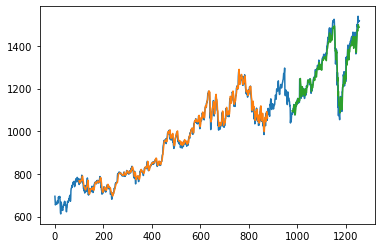

In [33]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scalar.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [40]:
model.save('model.h5')